Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Yifei Fan"
COLLABORATORS = ""

---

In [2]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# HW 8:  Linear Algebra Fun with the QR and the SVD

## Question 1: Fun with the QR

**(a)** [4] - Why we use the $QR$ factorization for least-squares.

Consider the two equivalent problems to solve for the least-squares solution $\hat{\mathbf{x}}$

The Normal Equations
$$
    A^TA\hat{\mathbf{x}} = A^T\mathbf{b}
$$

and using the $QR$ factorization with $A=QR$
$$
\quad R\hat{\mathbf{x}}=Q^T\mathbf{b}
$$


* Show that the condition number of $A^TA$ is the square of that of $A$ (i.e.$\kappa_2(A^T A)$ = $\kappa_2^2(A)$).  Hint: use the SVD $A=U\Sigma V^T$
* Show that $\kappa_2(R) = \kappa_2(A)$

so that solving using the $QR$ factorization is much more stable with respect to floating point error.

$$\kappa_2(A^T A)=\kappa_2((U\Sigma V^T)^T U\Sigma V^T)=\kappa_2(V\Sigma U^T U\Sigma V^T)=\kappa_2(V\Sigma ^2 V^T)=\frac{\sigma_{max}^2}{\sigma_{min}^2}$$
$$\kappa_2(A^T A)=\kappa_2^2(A)$$

$$\kappa_2(A)=\kappa_2(QR)\leq \kappa_2(Q)\kappa_2(R)=\kappa_2(R)$$
$$\kappa_2(R)=\kappa_2(Q^{-1}A)\leq \kappa_2(Q^{-1})\kappa_2(A)=\kappa_2(A)$$
$$\kappa_2(A)=\kappa_2(R)$$

**(b)** [8] - The Householder reflection matrix, 

$$
    H = I - 2\mathbf{q}\mathbf{q}^T
$$

reflects a vector $x$ across a mirror plane normal to a unit vector $\mathbf{q}$ and is an essential ingredient in many numerical methods.

Demonstrate the following properties of $H$

* $H$ is symmetric
* $H$ is Unitary
* $H$ is not a projection matrix
* if $\mathbf{x}$ is in $\mathbb{R}^n$,  the Matrix-vector product $H\mathbf{x}$ can be computed in $O(n)$ operations
* Repeated application of householder matrices to transform $A\rightarrow R$ do not change the condition number (i.e. $\kappa_2(HA) = \kappa_2(A) = \kappa_2(R)$

$H^T=(I - 2\mathbf{q}\mathbf{q}^T)^T=I-2(\mathbf{q}\mathbf{q}^T)^T=I - 2\mathbf{q}\mathbf{q}^T=H$

$H^TH=HH^T=HH=(I - 2\mathbf{q}\mathbf{q}^T)^2=I - 2\mathbf{q}\mathbf{q}^T-2\mathbf{q}\mathbf{q}^T + (2\mathbf{q}\mathbf{q}^T)^2=I - 4\mathbf{q}\mathbf{q}^T+4\mathbf{q}\mathbf{q}^T\mathbf{q}\mathbf{q}^T=I$

$H^2=I\neq H$

$Hx=(I - 2\mathbf{q}\mathbf{q}^T)x=x-2\mathbf{q}\mathbf{q}^Tx$

which involve only vector mutiplication that can be solve in $O(n)$

$\kappa_2(A)=\kappa_2(R)=\kappa_2(HA) \leq \kappa_2(H)\kappa_2(A) = \kappa_2(A)$

**(c)** [6] - To understand the basic algorithms better,  use the modified Gram-Schmidt algorithm 

$$A\rightarrow Q,\quad   R = Q^T A$$

to construct, by hand, matrices $Q$ and $R$ such that $A=QR$ for 

$$
    A = \begin{bmatrix} 1 & 1 & 1\\ 1 & 0 & 0 \\ 1 & 1 & 0  \\ 1 & 0 & 0 \\ \end{bmatrix} 
$$

You can use any python/numpy routines to check your answers

$v_1=(1,1,1,1)^T, q_1=v_1/||v_1||=(1/2,1/2,1/2,1/2)^T$

$v_2^{(1)}=(1,0,1,0)^T$

$v_3^{(1)}=(1,0,0,0)^T$

$v_2^{(2)}=(1,0,1,0)^T-q_1q_1^T(1,0,1,0)^T=(1/2,-1/2,1/2,-1/2)^T, q_2=v_2/||v_2||=(1/2,-1/2,1/2,-1/2)^T$

$v_3^{(2)}=(1,0,0,0)^T-q_1q_1^T(1,0,0,0)^T=(3/4,-1/4,-1/4,-1/4)^T$

$v_3^{(3)}=(3/4,-1/4,-1/4,-1/4)^T-q_2q_2^T(3/4,-1/4,-1/4,-1/4)^T=(1/2,0,-1/2,0)^T,q_3=v_3/||v_3||=(\sqrt{2}/2,0,-\sqrt{2}/2,0)^T$

$Q=\begin{bmatrix} 1/2 & 1/2 & \sqrt{2}/2\\ 1/2 & -1/2 & 0 \\ 1/2 & 1/2 & -\sqrt{2}/2  \\ 1/2 & -1/2 & 0 \\ \end{bmatrix} $

$R=Q^TA=\begin{bmatrix} 2 & 1 & 1/2\\ 0 & 1 & 1/2 \\ 0 & 0 & \sqrt{2}/2  \\  \end{bmatrix}$

**(c)** [4]  Householder Triangulation is a sequence of Unitary transformations $Q_1$, $Q_2$, $Q_3$, that transform $A$ to logically upper triangular form (i.e. is zero for all elements below the diagonal) using Householder reflection matrices.  Construct by hand

* the first Unitary matrix  $Q_1$ that zeros out the first column of A below the diagonal and calculate $A_1 = Q_1A$. (you can use numpy to check your solution).   **Hint**: there are two ways to calculate the normal to the reflection plane 
$\mathbf{v}$.  Your life will be 
much easier if you use the simpler version 

$$
    \mathbf{v} = ||\mathbf{x}||\mathbf{e}_1 - \mathbf{x}
$$

* the second unitary matrix $Q_2$ that preserves your first column but puts zeros below the diagonal in the second column.  You can use numpy to calculate $Q_2Q_1A$ to check your answer.

* **Extra Credit** (2 pts) Work out $Q3$  and $R=Q_3Q_2Q_1A$ and compare to the solution by Modified Gram-schmidt

$v_1=2(1,0,0,0)^T-(1,1,1,1)^T=(1,-1,-1,-1)^T,q_1=v_1/||v_1||=(1/2,-1/2,-1/2,-1/2)^T$

$Q_1=I-2qq^T=\begin{bmatrix} 1/2 & 1/2 & 1/2 & 1/2\\ 1/2 & 1/2 & -1/2 & -1/2 \\ 1/2 & -1/2 & 1/2 & -1/2  \\ 1/2 & -1/2 & -1/2 & 1/2 \\ \end{bmatrix}$

$A_1=\begin{bmatrix} 2 & 1 & 1/2 \\ 0 &0& 1/2\\ 0 & 1 & 1/2   \\ 0 & 0 &  1/2 \\ \end{bmatrix}$

$v_2=(1,0,0)^T-(0,1,0)^T=(1,-1,0)^T,q_2=v_2/||v_2||=(\sqrt{2}/2,-\sqrt{2}/2,0)^T$

$H_2=I-2q_2q_2^T=\begin{bmatrix} 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0& 1  \\ \end{bmatrix}$

$Q_2=\begin{bmatrix} 1 &0 & 0 & 0 \\0 &0 & 1 & 0 \\ 0 &1 & 0 & 0 \\ 0 &0 & 0& 1  \\ \end{bmatrix}$

$Q_2Q_1A=\begin{bmatrix} 2 & 1 & 1/2 \\ 0 &1& 1/2\\ 0 & 0 & 1/2   \\ 0 & 0 &  1/2 \\ \end{bmatrix}$

$v_3=\sqrt{2}/2(1,0,)^T-(1/2,1/2)^T=((\sqrt{2}-1)/2,-1/2)^T,q_3=v_3/||v_3||$

$H_3=I-2v_3v_3^T/||v_3||^2=\begin{bmatrix} \sqrt{2}/2 & \sqrt{2}/2 \\ \sqrt{2}/2& -\sqrt{2}/2  \\ \end{bmatrix}$

$Q_3=\begin{bmatrix} 1 &0 & 0 & 0 \\0 &1 & 0 & 0 \\0 &0 &\sqrt{2}/2 & \sqrt{2}/2 \\ 0 &0 &\sqrt{2}/2& -\sqrt{2}/2  \\ \end{bmatrix}$

$R=\begin{bmatrix} 2 & 1 & 1/2\\ 0 & 1 & 1/2 \\ 0 & 0 & \sqrt{2}/2  \\ 0 & 0 & 0  \\  \end{bmatrix}$

In [ ]:
# you can add code to check your answer here if you want

**(d)** [10] - Modify the $QR$ factorization by Householder reflection given in class `householder_QR` to write a function to solve linear least-squares problems, i.e. use repeated Householder reflections to transform

$$
    A\mathbf{x} = \mathbf{b}
$$

to

$$ R\mathbf{x} = \mathbf{c} $$

where $\mathbf{c} = Q^T\mathbf{b}$.  Then solve the last equation for $\mathbf{x}$ using `numpy.linalg.solve` (which implements a $LU$ decomposition for Gaussian elimination).


In [29]:
# Implementation of Householder QR, for least-squares
def mylstq(A, b):
    """
    Solves the leastsquares problem Ax = b, by Householder reduction to Rx = c,
    then solve Rx = c, using numpy.linalg.solve()
    
    Modified from householder_QR
    
    usage:  x = mylstq(A, b)
    """
    R = A.copy()
    m, n = A.shape
    QT = numpy.eye(m)
    for k in range(n):
        x = numpy.zeros(m)
        e = numpy.zeros(m)
        x[k:] = R[k:, k]
        e[k] = 1.0
        # simplest version v = ||x||e - x
        v =  numpy.linalg.norm(x, ord=2) * e - x
        v = v / numpy.linalg.norm(v, ord=2)
        R  -= 2.0 * numpy.outer(v,numpy.dot(v.T,R))
        QT  -= 2.0 * numpy.outer(v,numpy.dot(v.T,QT))
    c=numpy.matmul(QT[:n,:],b)
    x=numpy.linalg.solve(R[:n,:],c)
    return x

In [30]:
# Test this on the previous problem
A = numpy.array([ [ 1., 1., 1.],
                  [1., 0., 0.],
                  [1., 1., 0.],
                  [1., 0., 0.]])
b = numpy.array([ 3., -2., 1., 0.])

x = mylstq(A,b)
x_np = numpy.linalg.lstsq(A,b,rcond = None)[0]
print('my solution = {}'.format(x))
print('numpy.lstq  = {}'.format(x_np))
numpy.testing.assert_allclose(x, x_np)
print('Success!')

my solution = [-0.9999999999999998  1.9999999999999993  2.0000000000000004]
numpy.lstq  = [-0.9999999999999989  1.9999999999999982  1.9999999999999996]
Success!


**(e)** [4] - **Extra Credit** Use your routine to find the best fit of the function 

$$
    y = c_1 x + c_2e^{x}
$$ 
through the $(x, y)$ data points $(1,2)$, $(2,3)$, $(3,5)$, $(4,10)$, $(5,15)$ and make a plot comparing the best fit function to the data over the interval $x \in [0, 6]$.

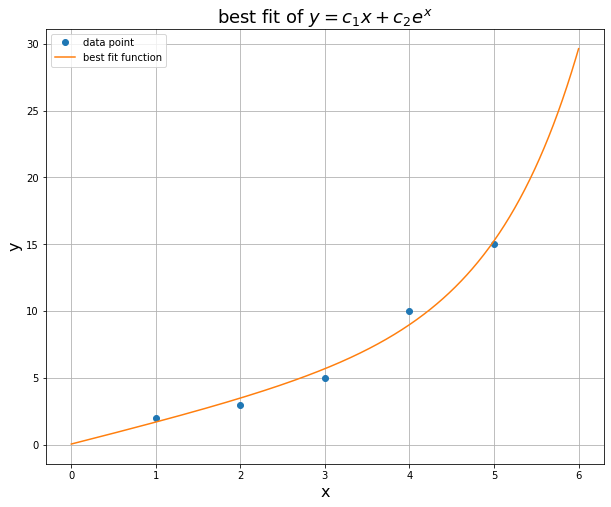

In [33]:
A=numpy.array([ [ 1., numpy.exp(1)],
                  [2.,  numpy.exp(2)],
                  [3.,  numpy.exp(3)],
                  [4.,  numpy.exp(4)],
                [5.,  numpy.exp(5)]])
b=numpy.array([ 2., 3., 5., 10.,15.])

c=mylstq(A,b)

myf=lambda x: c[0]*x+c[1]*numpy.exp(x)

datax=[1,2,3,4,5]
datay=[2,3,5,10,15]
x=numpy.linspace(0,6,1000)
fig = plt.figure(figsize=(10,8))
axes = fig.add_subplot(1, 1, 1)

axes.plot(datax, datay, 'o',label='data point')
axes.plot(x, myf(x), label='best fit function')
axes.set_title("best fit of $y = c_1 x + c_2e^{x}$", fontsize=18)
axes.set_xlabel("x", fontsize=16)
axes.set_ylabel("y", fontsize=16)
axes.legend(loc='best')
axes.grid()


plt.show()

## Question 2 - Hidden Figures

A little fun with the SVD.  Here we are going to use it extract low-dimensional information embedded in high dimensions.

The following cells will read in a matrix of 46765 samples of 5-dimensional data and make a series of scatter plots comparing the data along each dimension pairwise.

In [34]:
data = pd.read_csv('data.csv.gz').values
print('shape = {}'.format(data.shape))

shape = (46765, 5)


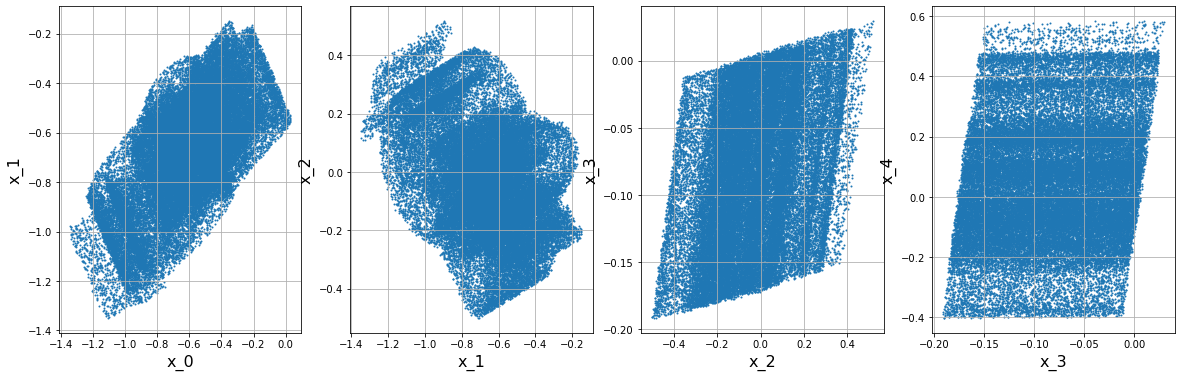

In [35]:
# plot scatter diagrams

fig = plt.figure(figsize=(20,6))
for i in range(4):
    axes = fig.add_subplot(1,4,i+1)
    axes.scatter(data[:,i],data[:,i+1],s=1)
    axes.set_xlabel('x_{}'.format(i), fontsize=16)
    axes.set_ylabel('x_{}'.format(i+1),fontsize=16)
    axes.grid()
plt.show()

**(a)** [6] Now demean the data and use the SVD to determine the dimension of the subspace of $\mathbb{R}^5$ that contains the data. Making a plot of the singular values will help. (hint: you will also want to use the `full_matrices=False` argument to the SVD to get the skinny SVD and save a lot of computation and memory)

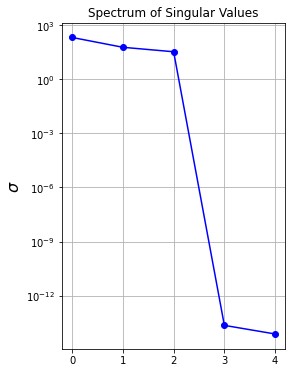

In [41]:
u, s, vt = numpy.linalg.svd(data,full_matrices=False)
fig = plt.figure(figsize=(4,6))
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(s,'bo-')
axes.set_ylabel('$\sigma$', fontsize=16)
axes.grid()
axes.set_title('Spectrum of Singular Values')
plt.show()

The greatest 3 singular values dominents the others. There is a 3 dimensional subspace of $\mathbb{R}^5$ that contains the most information of the data.

**(b)** [4]  Principal Components. Make a 2-D scatter plot that projects the data onto the plane spanned by the first two principal components (singular vectors of $V$).  and comment.  (**Extra Credit** do this in 3-D)

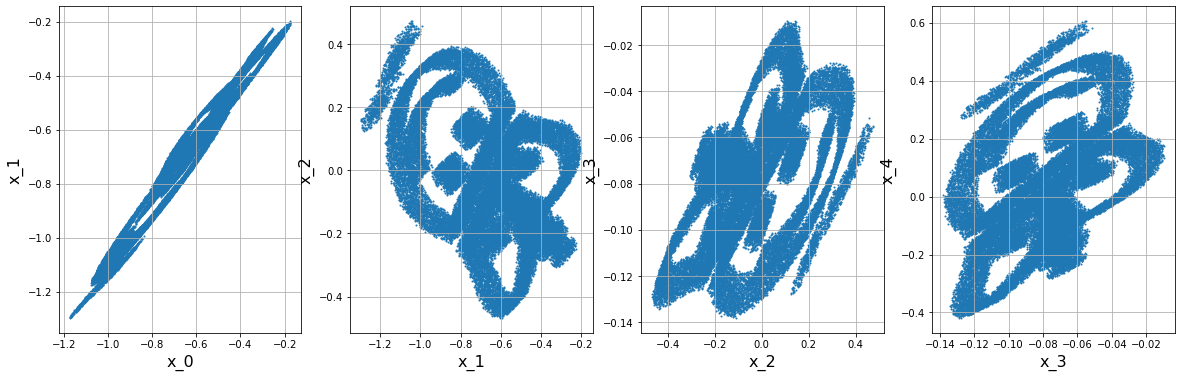

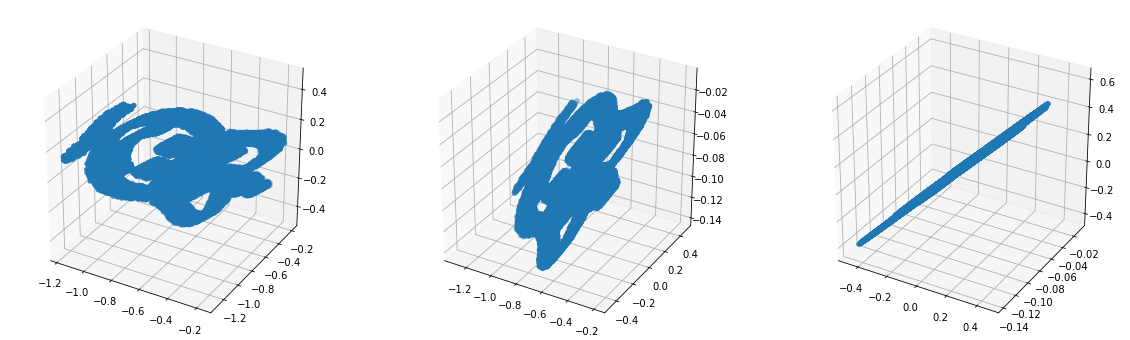

In [50]:
mode = s[0]*numpy.outer(u[:,0], vt[0,:])+s[1]*numpy.outer(u[:,1], vt[1,:])
fig = plt.figure(figsize=(20,6))
for i in range(4):
    axes = fig.add_subplot(1,4,i+1)
    axes.scatter(mode[:,i],mode[:,i+1],s=1)
    axes.set_xlabel('x_{}'.format(i), fontsize=16)
    axes.set_ylabel('x_{}'.format(i+1),fontsize=16)
    axes.grid()
plt.show()

fig = plt.figure(figsize=(20,6))
for i in range(3):
    axes = fig.add_subplot(1,3,i+1,projection='3d')
    axes.scatter(mode[:,i],mode[:,i+1],mode[:,i+2])
plt.show()

In [ ]:
I surprisingly find the face of Squidward.